# Objectness Classification DataModule EDA

In [19]:
import os
import sys
import git
import matplotlib.pyplot as plt

git_repo = git.Repo(os.getcwd(), search_parent_directories=True)
git_root = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(f"{git_root}/objectness_classification/")
from seed import set_seed
from datamodule import ObjnessClsDataModule

home = os.path.expanduser("~")
dataset_dir = os.path.join(home, "Documents/datasets")

## Ego4D dataset

In [11]:
from ego4d import Ego4DObjnessClsDataset

# Download data for training
Ego4DObjnessClsDataset(
    dataset_dir=dataset_dir,
    extract=True,
)
# Download data for validation
Ego4DObjnessClsDataset(
    dataset_dir=dataset_dir,
    phase='val',
    extract=True,
)

In [13]:
set_seed()
iter_counter = 0

ego4d_dataset = ObjnessClsDataModule(
    dataset_dir=dataset_dir,
    batch_size=1,
    with_transform=False,
    with_info=True,
)
ego4d_dataset.setup()

ego4d_train_dataloader = iter(ego4d_dataset.train_dataloader())
# ego4d_val_dataloader = iter(ego4d_dataset.val_dataloader())

Preparing data: 100%|██████████| 12801/12801 [00:00<00:00, 178053.38it/s]


iter counter: 1
frames shape: torch.Size([1, 3, 224, 224, 3])
labels shape: torch.Size([1, 3, 3, 224, 224])
index: tensor([8308])
clip uid: ['950f70a4-f90b-4a15-97a0-c14ad6960285']
pnr at: tensor([4297])


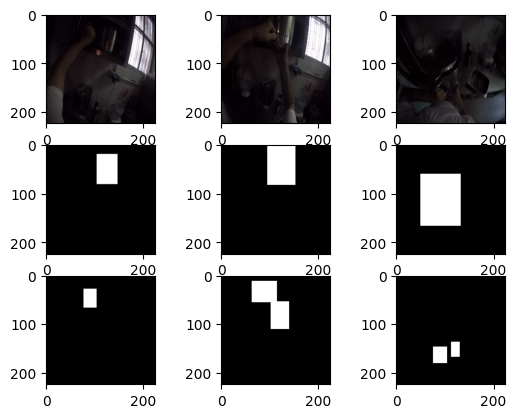

In [14]:
# from tqdm import tqdm
# for data in tqdm(ego4d_train_dataloader, desc='Searching for specific frame'):
#     if (
#         data[2]["clip_uid"][0] == "b8d8bd00-0c7c-4a73-bb3e-5debfa6cb274"
#         and int(data[2]["pnr_frame_num_clip"][0]) == 6220
#     ):
#         ego4d_frames, ego4d_labels, ego4d_info = data

ego4d_frames, ego4d_labels, ego4d_info = next(ego4d_train_dataloader)
iter_counter += 1
print(
    f"iter counter: {iter_counter}",
    f"frames shape: {ego4d_frames.shape}",
    f"labels shape: {ego4d_labels.shape}",
    f"index: {ego4d_info['index']}",
    f"clip uid: {ego4d_info['clip_uid']}",
    f"pnr at: {ego4d_info['pnr_frame_num_clip']}",
    sep="\n"
)

pre_img = ego4d_frames[0][0]
pre_mask = ego4d_labels[0][0]

pnr_img = ego4d_frames[0][1]
pnr_mask = ego4d_labels[0][1]

post_img = ego4d_frames[0][2]
post_mask = ego4d_labels[0][2]

fig = plt.figure()

fig.add_subplot(3, 3, 1)
plt.imshow(pre_img)
fig.add_subplot(3, 3, 4)
plt.imshow(pre_mask[1])
plt.gray()
fig.add_subplot(3, 3, 7)
plt.imshow(pre_mask[2])
plt.gray()

fig.add_subplot(3, 3, 2)
plt.imshow(pnr_img)
fig.add_subplot(3, 3, 5)
plt.imshow(pnr_mask[1])
plt.gray()
fig.add_subplot(3, 3, 8)
plt.imshow(pnr_mask[2])
plt.gray()

fig.add_subplot(3, 3, 3)
plt.imshow(post_img)
fig.add_subplot(3, 3, 6)
plt.imshow(post_mask[1])
plt.gray()
fig.add_subplot(3, 3, 9)
plt.imshow(post_mask[2])
plt.gray()

plt.show()

plt.clf()
plt.close()

## EgoHOS dataset

In [16]:
set_seed()
iter_counter = 0

egohos_dataset = ObjnessClsDataModule(
    dataset_dir=dataset_dir,
    dataset_mode='egohos',
    batch_size=1,
    with_transform=False,
    with_info=True,
)
egohos_dataset.setup()

egohos_train_dataloader = iter(egohos_dataset.train_dataloader())

iter counter: 1
frames shape: torch.Size([1, 224, 224, 3])
labels shape: torch.Size([1, 3, 224, 224])
file name: ('epic_P08_10_frame_0000007651',)


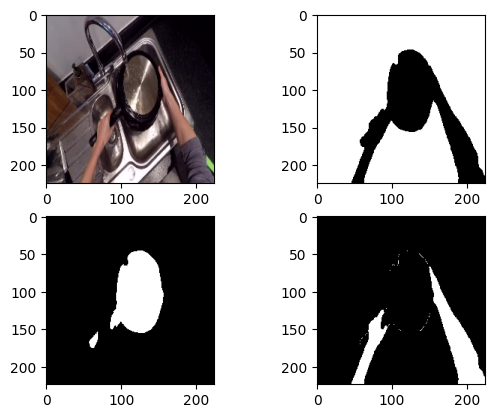

In [17]:
egohos_frames, egohos_labels, egohos_file = next(egohos_train_dataloader)
iter_counter += 1
print(
    f"iter counter: {iter_counter}",
    f"frames shape: {egohos_frames.shape}",
    f"labels shape: {egohos_labels.shape}",
    f"file name: {egohos_file}",
    sep="\n",
)

egohos_img = egohos_frames[0]
egohos_mask = egohos_labels[0]

fig = plt.figure()

fig.add_subplot(2, 2, 1)
plt.imshow(egohos_img)

fig.add_subplot(2, 2, 2)
plt.imshow(egohos_mask[0])
plt.gray()

fig.add_subplot(2, 2, 3)
plt.imshow(egohos_mask[1])
plt.gray()

fig.add_subplot(2, 2, 4)
plt.imshow(egohos_mask[2])
plt.gray()

plt.show()

plt.clf()
plt.close()